In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import webtfkeras as web

/Users/shreyadutta/conda/anaconda2/envs/py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


In [2]:
train_data, train_label, validation_data, validation_label, test_data, test_label = web.data_preparation_moe()
trained_model=web.main1()
predicted_indexes_moe=trained_model.predict(test_data)


Training data shape = (50000, 1)
Validation data shape = (50000, 1)
Test data shape = (50000, 1)
mmoe_layers type is=<class 'tensorflow.python.framework.ops.Tensor'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
m_mo_e_1 (MMoE)              (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
y0 (Dense)                   (None, 1)                 9         
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 50000 samples
Epoch 1/100
50000/50000 [==============================] - 5

KeyboardInterrupt: 

In [5]:
predicted_indexes_moe = predicted_indexes_moe[0]
predicted_indexes_moe=predicted_indexes_moe.squeeze()
import pandas as pd
predicted_indexes_moe_df = pd.DataFrame({'predicted_index':predicted_indexes_moe,'actual_index':test_label[0]})


In [6]:
error_in_index_moe=predicted_indexes_moe-test_label[0]

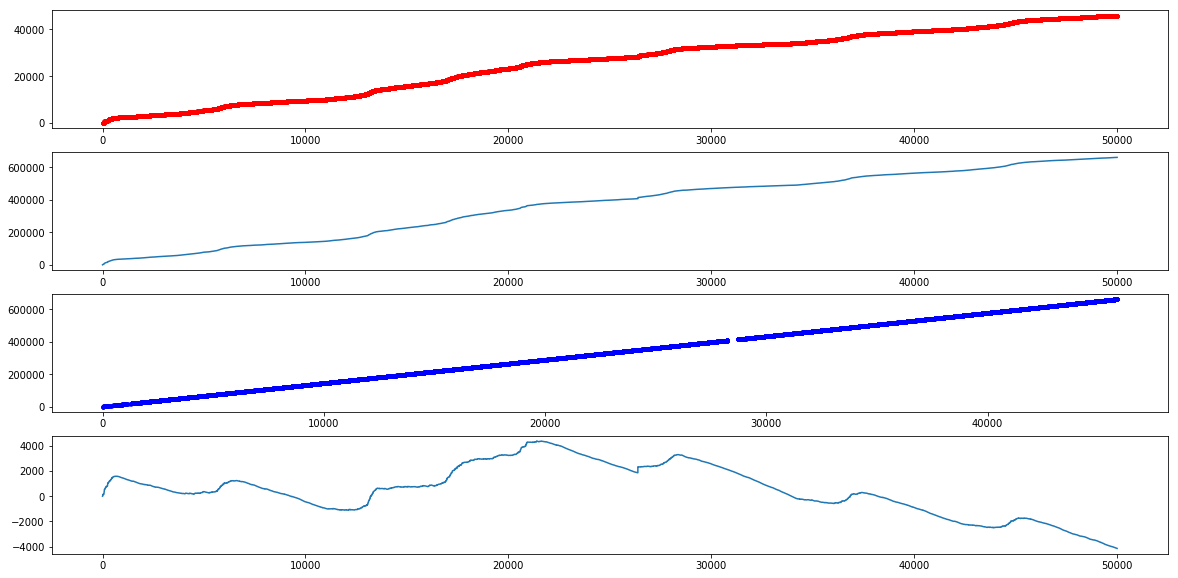

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(411)
ax.plot( predicted_indexes_moe_df.actual_index, predicted_indexes_moe_df.predicted_index,'r.');

ax = fig.add_subplot(412)
ax.plot(train_label[0] , train_data)

ax = fig.add_subplot(413)
ax.plot(predicted_indexes_moe_df.predicted_index , train_data, 'b.')

ax = fig.add_subplot(414)
ax.plot(train_label[0], error_in_index_moe)